# Reinforcement Learning

- Notebook Author: Ahmed Métwalli

# Section 1: Advanced AI Roadmap and introduction to Reinforcement learning (Q-Learning)

- In this tutorial, we have an introduction to the advanced AI including roadmap that shows each branch of AI. 
- Moreover, we have hands-on reinforcement learning tutorial to build Q-learning from scratch 

<img src = 'Mindmap.jpg' height = 1000 width = 1200>

## Reinforcement Learning Problem Statment:
Problem Statement:
- We'll use reinforcement learning to train an agent to navigate a grid world and reach a goal.
- The goal is to reach the bottom-right corner of the grid starting from the top-left corner while minimizing the steps (negative rewards) taken. The agent should learn to navigate the grid efficiently to reach the goal with the highest possible cumulative reward.


Key Concepts: 
1. **Environment**:\
The environment is the world in which the agent operates. It includes everything that the agent interacts with, including the state of the world and the rules governing the state transitions. In our example, the environment is the GridWorld.

2. **Grid**:\
The grid is a representation of the environment. It’s a 2D matrix where each cell represents a possible position of the agent. The grid has a start position (top-left corner) and a goal position (bottom-right corner).

3. **Agent**:\
The agent is an entity that interacts with the environment by taking actions. The agent's goal is to learn a policy that maximizes cumulative rewards over time. In our example, the agent moves within the grid to reach the goal.

4. **State**:\
A state is a specific configuration of the environment. In the grid world, a state is the agent's current position within the grid.

5. **Action**:\
An action is a move the agent can make. In our grid world, the actions are moving up, down, left, or right.

6. **Reward**:\
A reward is the feedback the agent receives after taking an action. It can be positive or negative, encouraging the agent to take actions that maximize cumulative rewards. In our grid world, the reward is -1 for each step taken and 10 for reaching the goal.

7. **Policy**:\
A policy is a strategy used by the agent to determine the next action based on the current state. In Q-learning, the policy is derived from the Q-values.

8. **Q-value**:\
The Q-value (quality value) is a measure of the value of a specific action in a specific state, representing the expected cumulative reward of that action.

9. **Exploration vs. Exploitation**:\
Exploration is the act of trying new actions to discover their effects, while exploitation is choosing the best-known action to maximize rewards. The ε-greedy strategy balances exploration and exploitation.

10. **Episodes**:\
Episodes are sequences of states, actions, and rewards that represent one complete experience of the agent interacting with the environment, starting from an initial state and ending when a taerminal state (or goal) is reached. Each episode is essentially a trial or an attempt for the agent to learn from its actions and the resulting outcomes.

- Common Parameters:
    - Common Parameter Values:
    - Learning Rate (alpha): 0.1 (moderate learning speed).
    - Discount Factor (gamma): 0.99 (prioritizes future rewards slightly).
    - Exploration Rate (epsilon): 1.0 (start with high exploration).
    - Epsilon Decay: 0.995 (gradually reduce exploration over episodes).
    - Step Penalty: Keep it minimal to encourage exploration, such as -1 per step.
    - Goal Reward: Typically a large positive reward, such as 100.

### Step 1: Setup Environment
We define a `GridWorld` class to represent our environment. The environment consists of a grid where the agent can move up, down, left, or right. The goal is to reach a specific position in the grid.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the environment: GridWorld
class GridWorld:
    """
    The GridWorld class defines the environment in which the agent operates.
    It simulates a grid-based world where the agent can move in four directions:
    up, down, left, and right. The goal is for the agent to reach the goal position
    while avoiding obstacles.
    
    Attributes:
        grid_size: Tuple representing the dimensions of the grid (rows, columns).
        start: Tuple representing the agent's starting position.
        goal: Tuple representing the goal position.
        obstacles: List of coordinates representing the obstacle positions.
        state: The current position of the agent.
        actions: A list of possible actions: ['up', 'down', 'left', 'right'].
    """
    
    def __init__(self, grid_size= ... , start= ... , goal= ..., obstacles= ...):
        """
        Initializes the GridWorld environment with the specified grid size, start, goal,
        and any obstacles.
        
        Parameters:
            grid_size: The size of the grid, a tuple (rows, columns).
            start: The starting position of the agent as a tuple (row, column).
            goal: The goal position in the grid as a tuple (row, column).
            obstacles: A list of coordinates representing obstacles. If no obstacles are
                       provided, it defaults to an empty list.
        """
        self.grid_size = ...  # Size of the grid (rows x columns)
        self.start = ...  # Agent's starting position
        self.goal = ...  # Goal position the agent must reach
        self.obstacles = obstacles if obstacles else []  # Obstacle positions, if any
        self.state = ...  # Initial state (agent starts at the start position)
        self.actions = ['up', 'down', 'left', 'right']  # List of possible actions

    def reset(self):
        """
        Resets the environment to the starting position of the agent.
        
        Returns:
            The initial state (start position) of the agent.
        """
        self.state = ... # Reset agent's position to the start
        return self.state  # Return the starting state

    def step(self, action):
        """
        Moves the agent based on the action provided.
        The action must be one of 'up', 'down', 'left', or 'right'.
        The method ensures that the agent stays within the grid boundaries and handles
        obstacle collisions.
        
        Parameters:
            action: The direction in which the agent will move ('up', 'down', 'left', 'right').
        
        Returns:
            new_state: The new position of the agent after taking the action.
            reward: The reward for taking that action. +100 for reaching the goal,
                    -1 for each move (small penalty to encourage faster goal-reaching).
            done: A boolean indicating whether the agent has reached the goal (True if goal reached).
        """
        row, col = ...  # Get the current position of the agent (current state)
        
        # Determine the new position based on the action
        if action == 'up':
            row = max(0, row - 1)  # Move up but prevent moving outside the grid
        elif action == 'down':
            row = min(self.grid_size[0] - 1, row + 1)  # Move down, staying within bounds
        elif action == 'left':
            col = max(0, col - 1)  # Move left but stay within bounds
        elif action == 'right':
            col = min(self.grid_size[1] - 1, col + 1)  # Move right, staying in the grid
        
        new_state = ...  # Update the agent's position (hint current row and col)
        
        # Check if the new position is an obstacle; if so, stay in the same place
        if new_state in self.obstacles:
            new_state = ...  # Hit an obstacle, so revert to the previous state (hint use previous state just before obstacle)

        self.state = new_state  # Update the current state to the new state

        # Check if the agent reached the goal
        if self.state == self.goal:
            return new_state, 100, True  # Reward +100 for reaching the goal, episode ends (done=True)
        else:
            return new_state, -1, False  # Small penalty (-1) for each step, episode continues (done=False)

    def render(self):
        """
        Visualizes the current state of the environment as a grid.
        The agent's position, goal, and obstacles are displayed numerically.
        5 represents the agent's current position, 10 represents the goal, and -1 represents obstacles.
        """
        grid = np.zeros(self.grid_size)  # Initialize an empty grid with zeros
        grid[self.goal] = 10  # Mark the goal position as 10
        
        # Mark obstacles as -1
        for obs in self.obstacles:
            grid[obs] = -1  # Obstacles are represented by -1
        
        # Mark the agent's current position as 5
        grid[self.state] = 5  # Agent's position represented by 5
        
        # Print the grid to the console for visualization
        print(grid)


### Step 2: Define the Agent
We define a `QLearningAgent` class that will learn to navigate the grid using Q-learning.
Q-learning is a model-free reinforcement learning algorithm because it does not attempt to build a model of the environment. Instead, it learns an optimal policy directly from the rewards and penalties encountered during interactions with the environment. Model-based methods, on the other hand, involve building and using a model of the environment for planning and decision-making.

#### Q-learning Update Rule:
$$ Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right) $$

Where:

- $\alpha$ is the learning rate
- $\gamma$ is the discount factor
- r is the reward
- Q(s, a) is the current state-action value
- $\max_{a'} Q(s', a')$ is the maximum future state-action value


<center><img src = 'UpdateRuleExample.png'></center>

In [ ]:
# Q-learning agent
class QLearningAgent:
    """
    The QLearningAgent class implements the Q-learning algorithm.
    It interacts with the GridWorld environment, learning the optimal policy by updating
    its Q-values based on rewards received for actions.
    
    Attributes:
        env: The GridWorld environment the agent interacts with.
        q_table: A table storing Q-values for state-action pairs. Each state has a Q-value for each possible action.
        alpha: Learning rate, controls how much new information overrides old knowledge.
        gamma: Discount factor, determines how much future rewards are considered in current decisions.
        epsilon: Exploration rate, controls the balance between exploration (random actions) and exploitation (greedy actions).
    """
    
    def __init__(self, env, alpha= ... , gamma= ... , epsilon= ...):
        """
        Initializes the Q-learning agent with the environment and Q-learning parameters.
        
        Parameters:
            env: The GridWorld environment.
            alpha: Learning rate (how much the agent learns from new experiences).
            gamma: Discount factor (importance of future rewards).
            epsilon: Exploration rate (probability of taking a random action to explore).
        """
        self.env = env  # The GridWorld environment the agent is interacting with
        self.q_table = np.zeros((*env.grid_size, len(env.actions)))  # Q-table initialized to zeros
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor (how much we value future rewards)
        self.epsilon = epsilon  # Exploration rate (probability of random exploration)

    def choose_action(self, state):
        """
        Chooses an action for the agent using an epsilon-greedy strategy.
        With probability epsilon, it chooses a random action (exploration),
        otherwise it chooses the action with the highest Q-value for the current state (exploitation).
        
        Parameters:
            state: The current position of the agent in the grid.
        
        Returns:
            The action the agent chooses ('up', 'down', 'left', or 'right').
        """
        # Explore with probability epsilon
        if ... < self.epsilon:
            return random.choice(self.env.actions)  # Random action (explore)
        else:
            row, col = state  # Get the agent's current position
            action_index = ...  # Choose the action with the highest Q-value (exploit)
            return self.env.actions[action_index]  # Return the chosen action

    def update_q_value(self, state, action, reward, next_state):
        """
        Updates the Q-value for the given state-action pair using the Q-learning update rule.
        
        Parameters:
            state: The current state (position) of the agent.
            action: The action taken ('up', 'down', 'left', or 'right').
            reward: The reward received after taking the action.
            next_state: The state the agent ends up in after taking the action.
        """
        row, col = state  # Get the current state (row, col)
        next_row, next_col = next_state  # Get the next state (row, col)
        action_index = self.env.actions.index(action)  # Get the index of the action

        # Q-learning update formula:
        # Q(s, a) = Q(s, a) + alpha * [reward + gamma * max(Q(s', a')) - Q(s, a)]
        best_next_action = np.max(...)  # Best Q-value for the next state
        td_target = reward + ... * best_next_action  # Target value (TD target)
        td_error = td_target - ...  # TD error
        self.q_table[row, col, action_index] += self.alpha * td_error  # Update the Q-value with learning rate alpha

    def train(self, episodes=500):
        """
        Trains the agent by letting it interact with the environment over a specified number of episodes.
        In each episode, the agent explores the environment, learns from the rewards, and updates its Q-values.
        
        Parameters:
            episodes: The number of episodes (or iterations) to train the agent for.
        """
        for episode in range(episodes):
            state = ...  # Reset the environment at the start of each episode
            done = False  # The episode continues until the agent reaches the goal
            total_reward = 0  # Track the total reward the agent receives in this episode

            while not ...:
                action = ...  # Choose an action using epsilon-greedy strategy
                next_state, reward, done = self.env.step(action)  # Perform the action and observe the result
                self.update_q_value(state, action, reward, next_state)  # Update Q-values based on the experience
                state = ...  # Move to the next state
                total_reward += ...  # Accumulate the reward

            # Every 10 episodes, print the total reward for monitoring the learning progress
            if episode % 10 == 0:
                print(f'Episode {episode}, Total Reward: {total_reward}')

    def display_policy_arrows(self):
        """
        Displays the learned policy using arrows to represent the best action from each state.
        Arrows are shown on a grid corresponding to the optimal policy for each state.
        Obstacles are shown as '#' and the goal as 'G'.
        """
        directions = {0: '↑', 1: '↓', 2: '←', 3: '→'}  # Map actions to arrows for display
        fig, ax = plt.subplots(figsize=(7, 7))  # Set up the plot with a 7x7 grid

        # Create a grid to visualize obstacles and the goal
        grid = np.zeros(self.env.grid_size)  # Initialize a grid with zeros
        for obs in self.env.obstacles:
            grid[obs] = -1  # Mark obstacles with -1
        grid[self.env.goal] = 10  # Mark the goal with 10

        # Flip the y-axis so that the origin (0,0) is at the bottom-left for visualization
        ax.invert_yaxis()

        # Display the learned policy as arrows
        for row in range(self.env.grid_size[0]):
            for col in range(self.env.grid_size[1]):
                if (row, col) in self.env.obstacles:
                    # Display obstacles as '#'
                    ax.text(col, row, '#', va='center', ha='center', fontsize=24, color='black')
                elif (row, col) == self.env.goal:
                    # Display the goal as 'G'
                    ax.text(col, row, 'G', va='center', ha='center', fontsize=24, color='green')
                else:
                    # Display the best action (as an arrow) for each state
                    action_index = np.argmax(self.q_table[row, col])  # Find the best action from the Q-table
                    ax.text(col, row, directions[action_index], va='center', ha='center', fontsize=24)

        # Format the grid with minor ticks to clearly show each cell boundary
        ax.set_xticks(np.arange(-0.5, self.env.grid_size[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.env.grid_size[0], 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)  # Draw grid lines
        ax.tick_params(which="minor", size=0)  # Remove tick marks
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks
        plt.title("Learned Policy Arrows", fontsize=16)  # Add a title to the plot
        plt.show()  # Display the plot



### Step 3: Training the Agent
We train the agent by running multiple episodes and updating the Q-table.


In [ ]:
class Helper:
    @staticmethod
    def run_pipeline(grid_size = (5,5), start = (0,0), goal = (4,4), obstacles = [(1,1), (2,2), (3,3)],episodes = 50):
        # Create the environment and agent

        env = GridWorld(grid_size=grid_size, start=start, goal=goal, obstacles=obstacles)
        agent = QLearningAgent(env)

        # Train the agent
        agent.train(episodes=episodes)

        # Display the final learned policy as arrows
        agent.display_policy_arrows()

        # Test the agent with the learned policy
        state = env.reset()
        env.render()
        done = False
        while not done:
            action = agent.choose_action(state)
            state, _, done = env.step(action)
            env.render()


Episode 0, Total Reward: -31
Episode 10, Total Reward: 60
Episode 20, Total Reward: 82
Episode 30, Total Reward: 90
Episode 40, Total Reward: 92


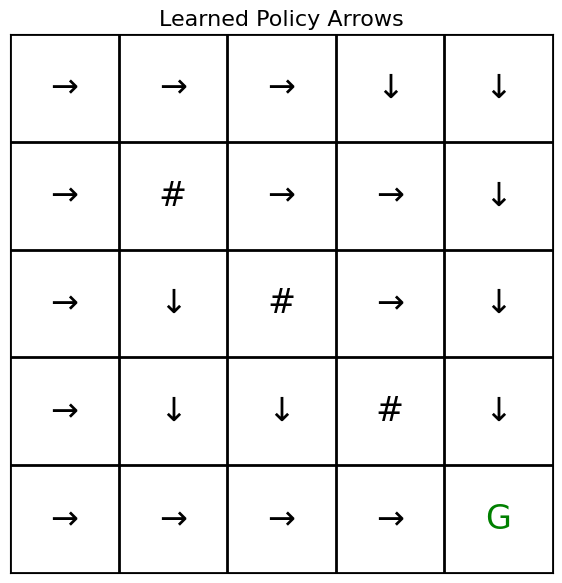

[[ 5.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  5.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  5.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  5.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  5.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  5.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  5.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  5.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 

In [ ]:
Helper.run_pipeline()

# Introduction to Gym and Stable-Baselines3 Libraries

**Gym**:
- Gym is an open-source toolkit for developing and comparing reinforcement learning algorithms. Created by OpenAI, Gym provides a variety of environments ranging from simple text-based to complex physics-based environments, making it a valuable resource for both beginners and advanced researchers in the field of reinforcement learning.
    - Key features:
        - Standardized Interface: Gym provides a consistent and easy-to-use interface for interacting with different environments.
        - Wide Range of Environments: Includes classic control problems, Atari games, and robotic tasks.
        - Extensibility: Allows users to create and add their own custom environments.
    - Basic Usage:
        ```python
        # Import Gym library
        import gym
        # Create an environment instance
        env = gym.make('CartPole-v1')
        # Reset the environment to the initial state
        state = env.reset()
        # Loop to take steps in the environment
        for _ in range(1000):
            # Render the environment (visualize it)
            env.render()
            # Sample a random action from the action space
            action = env.action_space.sample()
            # Take the action and get the next state, reward, done flag, and additional info
            state, reward, done, info = env.step(action)
            # Check if the episode is done, and if so, break the loop
            if done:
                break
        # Close the environment
        env.close()
        ```

**Stable-Baselines3**:
- Stable-Baselines3 (SB3) is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is a fork of Stable-Baselines, designed to be easy to use and extend.
    - Key Features:
        - Well-Tested Algorithms: Includes implementations of popular RL algorithms such as DQN, PPO, A2C, and SAC.
        - Easy Integration: Seamlessly integrates with Gym environments.
        - Extensive Documentation: Comprehensive documentation and tutorials to help users get started quickly.
    - Basic Usage:
        ```python
        # Import necessary libraries
        from stable_baselines3 import PPO  # Import the PPO algorithm
        from stable_baselines3.common.envs import DummyVecEnv  # Import DummyVecEnv for vectorized environment
        import gym  # Import Gym library
        # Create a vectorized environment instance
        env = DummyVecEnv([lambda: gym.make('CartPole-v1')])
        # Create a PPO model with MlpPolicy (a multi-layer perceptron policy)
        model = PPO('MlpPolicy', env, verbose=1)
        # Train the model for 10,000 timesteps
        model.learn(total_timesteps=10000)
        # Save the trained model
        model.save("ppo_cartpole")
        # To load and continue training
        model = PPO.load("ppo_cartpole")
        model.set_env(env)
        model.learn(total_timesteps=10000)
        ```


## Problem Statement:

- Objective: Train an agent to navigate a grid-based environment (FrozenLake) using Deep Q-Networks (DQN) to reach a goal while avoiding obstacles.

- Environment: FrozenLake-v1 (non-slippery), a 4x4 grid where the agent must reach a goal by navigating around holes.

- Task: Implement and train a DQN model using Stable Baselines3 to solve the FrozenLake environment and visualize the agent's path.

### DQN?

Essentially, deep Q-Learning replaces the regular Q-table with the neural network. Rather than mapping a (state, action) pair to a Q-value, the neural network maps input states to (action, Q-value) pairs.

One of the main drawbacks of Q-learning is that 
- it becomes infeasible when dealing with large state spaces, 
    - as the size of the Q-table grows exponentially with the number of states and actions. 
        - In such cases, the algorithm becomes computationally expensive 
        - and requires a lot of memory to store the Q-values. 
    - Imagine a game with 1000 states and 1000 actions per state. 
        - We would need a table of one million cells.
        - And that is a very small state space compared to chess or Go. 
- Also, Q-learning can’t be used in unknown states because it can’t infer the Q-value of new states from the previous ones. This presents two problems:
    - First, the amount of memory required to save and update that table would increase as the number of states increases.
    - Second, the amount of time required to explore each state to create the required Q-table would be unrealistic.

<img src = 'DQN_vs_Q.png'>

- Environment: DQN interacts with an environment with a state, an action space, and a reward function. 
    - The goal of the DQN is to learn the optimal policy that maximizes cumulative rewards over time
- Replay Memory: DQN uses a replay memory buffer to store past experiences. 
    - Each experience is a tuple (state, action, reward, next state) representing a single transition from one state to another. 
    - The replay memory stores these experiences to sample from later randomly
- Deep Neural Network: DQN uses a deep neural network to estimate the Q-values for each (state, action) pair. 
    - The neural network takes the state as input and outputs the Q-value for each action. 
    - The network is trained to minimize the difference between the predicted and target Q-values

- Epsilon-Greedy Exploration: DQN uses an epsilon-greedy exploration strategy to balance exploration and exploitation. 
    - During training, the agent selects a random action with probability epsilon 
    - and selects the action with the highest Q-value with probability (1 – epsilon)

- Target Network: DQN uses a separate target network to estimate the target Q-values. 
    - The target network is a copy of the main neural network with fixed parameters.
    - The target network is updated periodically to prevent the overestimation of Q-values

- Training: DQN trains the neural network using the Bellman equation to estimate the optimal Q-values. 
    - The loss function is the mean squared error between the predicted and target values. 
    - The target Q-value is calculated using the target network and the Bellman equation. 
    - The neural network weights are updated using backpropagation and stochastic gradient descent

- Testing: DQN uses the learned policy to make environmental decisions after training. 
    - The agent selects the action with the highest Q-value for a given state

    Notes:
    'MlpPolicy': Refers to the policy type, specifically a multi-layer perceptron policy, where the agent’s policy (decision-making function) is represented by a neural network with multiple layers.

    Parameters for the create_training_environment Method:
    exploration_fraction=0.3:

    Description: Controls the fraction of total training timesteps during which the agent explores rather than exploits. The exploration rate decays from the initial value to the final value (exploration_final_eps) over this fraction of timesteps.
    Effect: Encourages exploration in the early stages of training, helping the agent learn better by exploring different actions instead of sticking to the best-known action.
    exploration_final_eps=0.02:

    Description: The final exploration rate after the exploration_fraction timesteps. This is the probability of selecting a random action instead of the one predicted by the policy (i.e., the epsilon in ε-greedy).
    Effect: Ensures that after sufficient training, the agent mostly exploits the learned policy while still occasionally exploring.
    learning_rate=1e-3:

    Description: The step size used by the optimizer (e.g., Adam) during training. It controls how much the model's weights are adjusted with each gradient update.
    Effect: A lower learning rate makes the training more stable but slower, while a higher rate speeds up learning but can cause instability. Here, 1e-3 (0.001) is a common default learning rate.
    buffer_size=10000:

    Description: Size of the replay buffer that stores past experiences (state, action, reward, next state). The buffer is used to sample minibatches of experiences for training, which helps in breaking correlations between consecutive experiences.
    Effect: A larger buffer allows the agent to learn from more diverse past experiences but requires more memory. 10,000 experiences are stored in this case.
    learning_starts=1000:

    Description: Number of steps before the learning process begins. During this time, the agent only explores (takes random actions) and doesn't update the model.
    Effect: Gives the agent a chance to gather sufficient experience in the replay buffer before updating the policy.
    batch_size=32:

    Description: Number of samples drawn from the replay buffer to update the model at each step.
    Effect: Smaller batch sizes tend to make noisier updates, while larger batch sizes provide more stable updates. In this case, the DQN model will update with 32 experiences at a time.
    gamma=0.99:

    Description: The discount factor that determines how much the agent values future rewards. It ranges from 0 to 1, where 1 means the agent is farsighted (cares about future rewards) and 0 means it only cares about immediate rewards.
    Effect: 0.99 is close to 1, meaning the agent will try to maximize long-term rewards, not just immediate ones.
    train_freq=4:

    Description: How often the model is updated in terms of environment steps. Here, the model is updated every 4 steps.
    Effect: Updating less frequently can reduce the computation cost and prevent overfitting to recent experiences, while more frequent updates can accelerate learning but might overfit to short-term patterns.
    target_update_interval=1000:

    Description: How frequently the target network is updated. The target network is a stable version of the policy network, and its weights are updated by copying the policy network's weights every target_update_interval steps.
    Effect: Ensures that the target network used for estimating future rewards is updated less frequently, improving the stability of the learning process.
    policy_kwargs={'net_arch':[64, 64]}:

    Description: Specifies the architecture of the policy network. Here, net_arch=[64, 64] defines two hidden layers with 64 neurons each in the MLP (Multi-Layer Perceptron).
    Effect: This creates a neural network with two hidden layers, allowing the agent to learn complex policies. The larger and deeper the network, the more capacity it has to learn.
    is_slippery=False:

    Description: This parameter is specific to the FrozenLake environment. When is_slippery=False, the agent has deterministic control over its actions (no slipping on the ice).
    Effect: With is_slippery=True, the environment becomes stochastic (the agent may slip and end up in an unintended location). Setting it to False makes the environment simpler and deterministic.
    total_timesteps=20000:

    Description: The total number of timesteps (iterations) for which the agent will be trained.
    Effect: More timesteps allow the agent to explore and learn more. 20,000 is a moderate number for training the agent, and increasing this number can improve performance (though it will take longer to train).


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3315     |
|    time_elapsed     | 0        |
|    total_timesteps  | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.5      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3474     |
|    time_elapsed     | 0        |
|    total_timesteps  | 68       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8        |
|    ep_rew_mean      | 0      

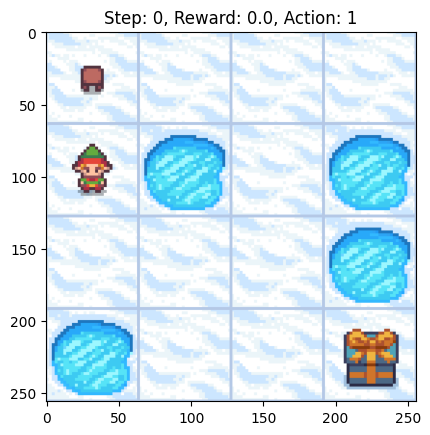

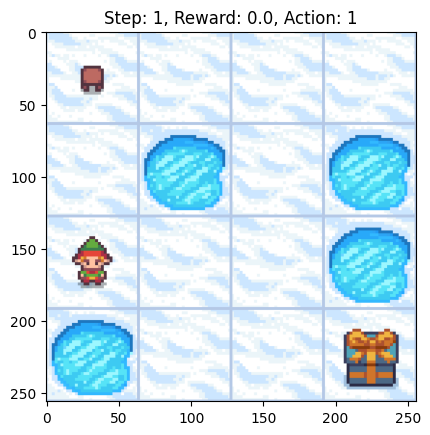

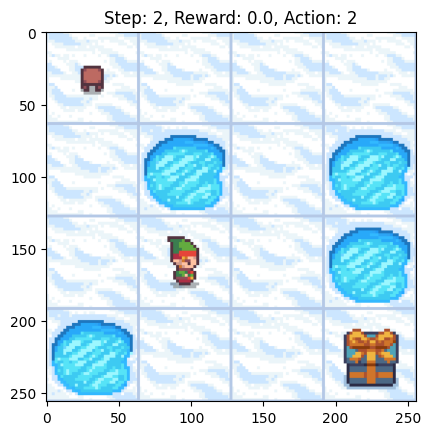

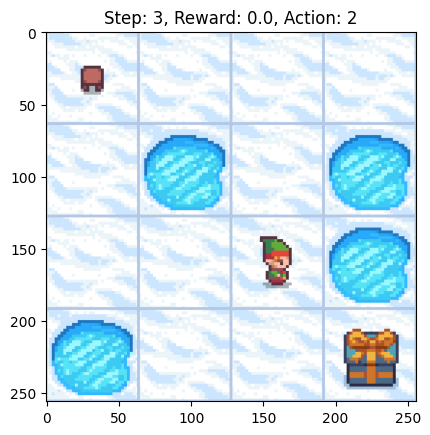

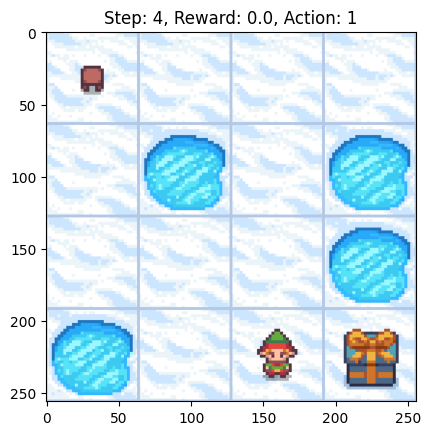

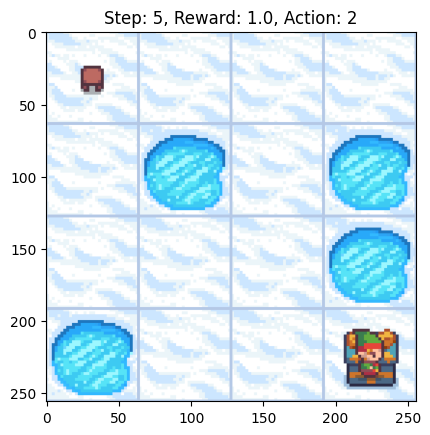

Total Reward: 1.0
Actions taken: [array(1, dtype=int64), array(1, dtype=int64), array(2, dtype=int64), array(2, dtype=int64), array(1, dtype=int64), array(2, dtype=int64)]


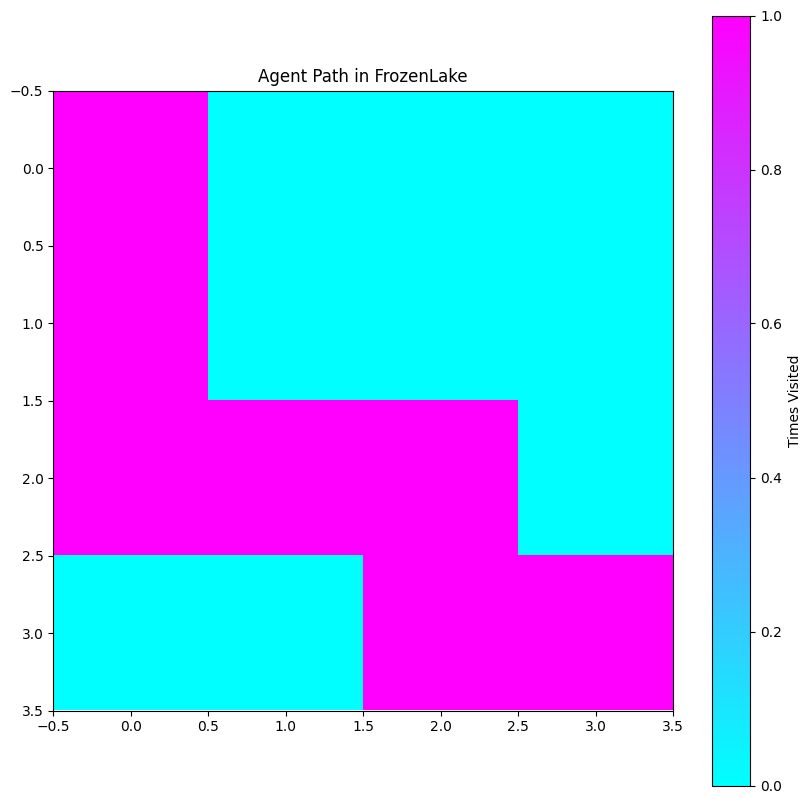

In [ ]:
import ...  # Import Gymnasium library
from ...  # Import DQN algorithm from Stable-Baselines3
import matplotlib.pyplot as plt
import numpy as np

class Utility:
    @staticmethod
    def create_training_environment(exploration_fraction=0.3, exploration_final_eps=0.02, learning_rate=1e-3, buffer_size=10000, learning_starts=1000, batch_size=32, gamma=0.99, train_freq=4, target_update_interval=1000, policy_kwargs={'net_arch':[64, 64]},is_slippery=False,total_timesteps = 20000):
        # Create the environment using a predefined Gym environment with render_mode (Frozen Lake v1)
        env = ...  # Non-slippery version for simplicity

        # Create the DQN model with MlpPolicy (a multi-layer perceptron policy)
        # Hint: See each parameter in the method DQN you imported
        model = ...(..., env, verbose=1, exploration_fraction=exploration_fraction, exploration_final_eps=exploration_final_eps, learning_rate=learning_rate, buffer_size=buffer_size, learning_starts=learning_starts, batch_size=batch_size, gamma=gamma, train_freq=train_freq, target_update_interval=target_update_interval, policy_kwargs=policy_kwargs)

        # Train the model for timesteps to improve learning
        model.learn(...)
        
        return env,model

    @staticmethod
    # Function to render the environment and visualize the agent's path
    def visualize_path(env, model):
        obs, _ = ...  # Reset the environment to the initial state
        total_reward = ... # Initialize
        steps = ... # Intialize
        path = [obs]
        actions = []
        while steps < 100:  # Limit the number of steps to 100
            action, _states = ...  # Get the action from the model
            obs, reward, done, ..., _ = env.step(int(...))  # Take a step in the environment, ensure action is an int
            total_reward += ...  # Accumulate the reward
            path.append(...)
            actions.append(...)
            img = env.render()  # Render the environment to visualize the agent's movement
            plt.imshow(img)
            plt.title(f"Step: {...}, Reward: {...}, Action: {...}")
            plt.show()
            steps += 1
            if done or ...:  # Stop if the agent reaches the goal or if truncated
                break

        print(f"Total Reward: {...}")  # Print the total reward accumulated by the agent
        print(f"Actions taken: {...}")  # Print the actions taken by the agent

        # Convert the path to a grid
        path_grid = np.zeros((env.unwrapped.desc.shape[0], env.unwrapped.desc.shape[1]))
        for pos in path:
            path_grid[pos // env.unwrapped.desc.shape[1], pos % env.unwrapped.desc.shape[1]] += 1

        # Plot the path
        plt.figure(figsize=(10, 10))
        plt.imshow(path_grid, cmap='cool', interpolation='nearest')
        plt.colorbar(label='Times Visited')
        plt.title('Agent Path in FrozenLake')
        plt.show()

#Helper
class Helper:
    def run_pipeline(exploration_fraction=0.3, exploration_final_eps=0.02, learning_rate=1e-3, buffer_size=10000, learning_starts=1000, batch_size=32, gamma=0.99, train_freq=4, target_update_interval=1000, policy_kwargs={'net_arch':[64, 64]},is_slippery=False,total_timesteps = 20000):
        
        env, model = Utility.create_training_environment(is_slippery=is_slippery,exploration_fraction=exploration_fraction, exploration_final_eps=exploration_final_eps, learning_rate=learning_rate, buffer_size=buffer_size, learning_starts=learning_starts, batch_size=batch_size, gamma=gamma, train_freq=train_freq, target_update_interval=target_update_interval, policy_kwargs=policy_kwargs,total_timesteps=total_timesteps) # Utility?
        Utility.visualize_path(env, model)
        
Helper.run_pipeline()
